In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression

In [2]:
path = "D:\Manipal Data Science\Term 2\Machine Learning"
os.chdir(path)

In [3]:
mall_cust = pd.read_csv("Mall_Customers.csv")
mall_cust.head()

,CustomerID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


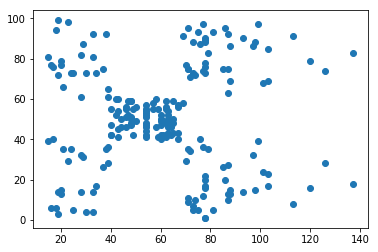

In [5]:
x = mall_cust['Income']
y = mall_cust['SpendingScore']

plt.scatter(x,y,cmap='Red')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


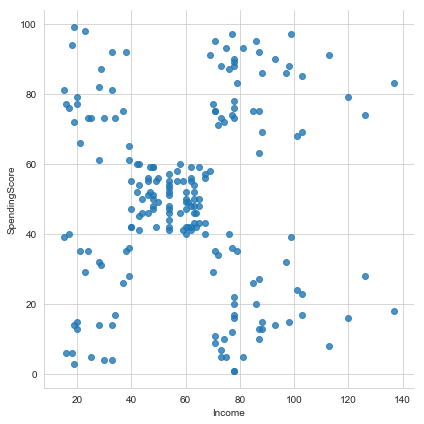

In [8]:
sns.set_style('whitegrid')
sns.lmplot('Income','SpendingScore',data=mall_cust,
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

#### here as we can see 5 cluster above and we can divide them into following like--->less income less spending score,less income high spending score, medium income medium spending score , high income less spending score and high income high spending score

In [30]:
km = KMeans(n_clusters=5,random_state=1)
km.fit(mall_cust[['Income','SpendingScore']])
print("The centers of clusters are:\n",km.cluster_centers_)
print("Cluster Labels:",km.labels_)

The centers of clusters are:
 [[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]
Cluster Labels: [4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


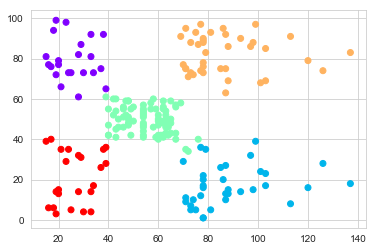

In [31]:
plt.scatter(mall_cust['Income'],mall_cust['SpendingScore'],c=km.labels_,cmap='rainbow')
plt.show()

In [26]:
mall_cust['Cluster'] = km.labels_
mall_cust.head(10)

,CustomerID,Genre,Age,Income,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,4
7,8,Female,23,18,94,0
8,9,Male,64,19,3,4
9,10,Female,30,19,72,0


In [27]:
def spending_score(score):
    if score == 0:
        return "Low income-high spend"
    if score == 1:
        return "High income-low spend"
    if score == 2:
        return "Medium income-medium spend"
    if score == 3:
        return "High income-high spend"
    if score == 4:
        return "Low income-low spend"
mall_cust['Income & Expenditure'] = mall_cust['Cluster'].apply(spending_score)
mall_cust.head(8)

,CustomerID,Genre,Age,Income,SpendingScore,Cluster,Income & Expenditure
0,1,Male,19,15,39,4,Low income-low spend
1,2,Male,21,15,81,0,Low income-high spend
2,3,Female,20,16,6,4,Low income-low spend
3,4,Female,23,16,77,0,Low income-high spend
4,5,Female,31,17,40,4,Low income-low spend
5,6,Female,22,17,76,0,Low income-high spend
6,7,Female,35,18,6,4,Low income-low spend
7,8,Female,23,18,94,0,Low income-high spend


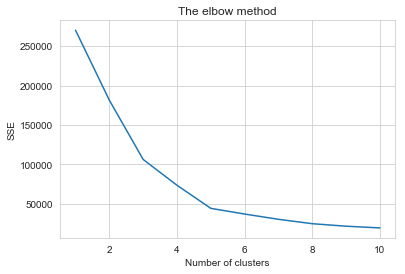

In [32]:
# Elbow chart

X = mall_cust.iloc[:,[3,4]].values

# using the elbow method to find the optimal number of clusters

ls = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    ls.append(km.inertia_)      # sum of squared distances of samples to their closest cluster centres
    
plt.plot(range(1,11),ls)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [33]:
# Fitting K-Means to the dataset

km = KMeans(n_clusters=3)
y_means = km.fit_predict(X)

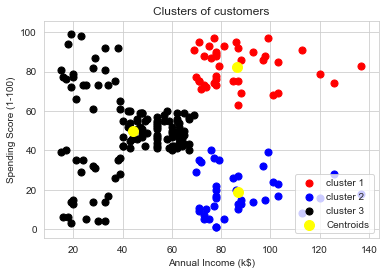

In [41]:
# Visualising the clusters

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s = 50, c= 'red', label = 'cluster 1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s = 50, c= 'blue', label = 'cluster 2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s = 50, c= 'black', label = 'cluster 3')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100 ,c = 'yellow',label='Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc = 'lower right')
plt.show()

In [42]:
# Fitting K-Means to the dataset

km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

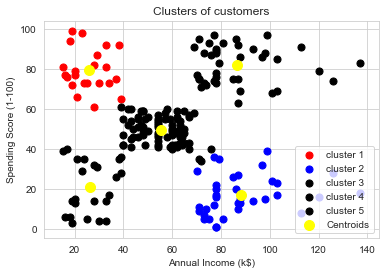

In [44]:
# Visualising the clusters

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s = 50, c= 'red', label = 'cluster 1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s = 50, c= 'blue', label = 'cluster 2')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s = 50, c= 'black', label = 'cluster 3')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s = 50, c= 'black', label = 'cluster 4')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],s = 50, c= 'black', label = 'cluster 5')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100 ,c = 'yellow',label='Centroids')
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(loc = 'lower right')
plt.show()

In [47]:
mall_cust = mall_cust.drop(('Income & Expenditure'),axis=1)

In [50]:
le = LabelEncoder()
for column in mall_cust.columns:
    if mall_cust[column].dtype == type(object):
        mall_cust[column] = le.fit_transform(mall_cust[column])
        
mall_cust.head()

,CustomerID,Genre,Age,Income,SpendingScore,Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,0
2,3,0,20,16,6,4
3,4,0,23,16,77,0
4,5,0,31,17,40,4


In [55]:
x = mall_cust.drop(('Cluster'),axis=1).values
y = mall_cust['Cluster'].values

In [56]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=1)

In [57]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)
print("kNN Score=",knn.score(x_test,y_test)*100)        


prediction = knn.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print("Confusion matrix is:", cm ,sep='\n')

kNN Score= 97.5
Confusion matrix is:
[[ 5  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  5  0]
 [ 0  0  1  0  7]]


In [59]:
#-----------Gaussian 

gnb = GaussianNB()
gnb.fit(x_train,y_train)


y_pred = gnb.predict(x_test)

print("accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

accuracy(in %): 100.0


In [61]:
model = LogisticRegression()
model.fit(x_train, y_train)

print("Log reg score on hr_fianl data set", model.score(x_test, y_test))
y_pred = model.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Log reg score on hr_fianl data set 0.975
Confusion Matrix is:
[[ 4  0  1  0  0]
 [ 0  9  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0  8]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
